<a href="https://colab.research.google.com/github/Ruchit42/Online_News_Shares/blob/main/Capstone_News_shares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Installing Libraries important for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the csv file which contains the dataset
df = pd.read_csv('/content/sample_data/OnlineNewsPopularity.csv',index_col = 0)#--setting index col allows selecting data by labels (further below)



In [5]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
df.shape

(39644, 60)

In [7]:
#understanding the descriptive information about the data
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


#Preparing data for analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  float64
 1    n_tokens_title                 39644 non-null  float64
 2    n_tokens_content               39644 non-null  float64
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  float64
 7    num_self_hrefs                 39644 non-null  float64
 8    num_imgs                       39644 non-null  float64
 9    num_videos                     39644 non-null  float64
 10   average_token_length           39644 non-null  floa

* Almost all of the variables are float data type and the targer variable is of type int


In [9]:
# Check for any null values
df.isnull().sum()

 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares  

* No NULL values!!!

In [10]:
# Checking for duplicates in our dataframe
#Check for dulicate rows except the first occurrence
df.duplicated()

url
http://mashable.com/2013/01/07/amazon-instant-video-browser/                             False
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/                              False
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/                           False
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/                                 False
http://mashable.com/2013/01/07/att-u-verse-apps/                                         False
                                                                                         ...  
http://mashable.com/2014/12/27/samsung-app-autism/                                       False
http://mashable.com/2014/12/27/seth-rogen-james-franco-will-live-tweet-the-interview/    False
http://mashable.com/2014/12/27/son-pays-off-mortgage/                                    False
http://mashable.com/2014/12/27/ukraine-blasts/                                           False
http://mashable.com/2014/12/27/youtube-channel

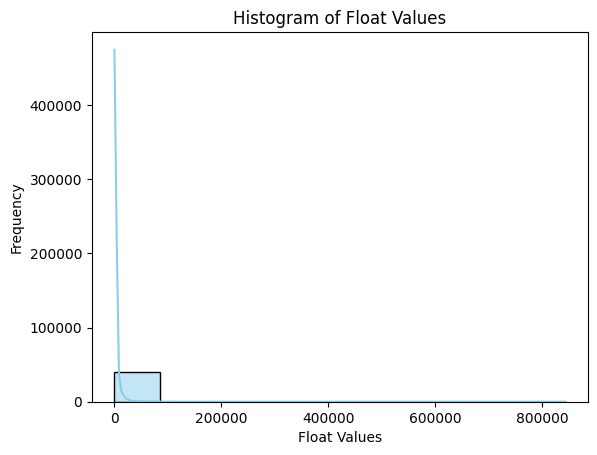

In [11]:
sns.histplot(df[' shares'], bins=10, kde=True, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel('Float Values')
plt.ylabel('Frequency')
plt.title('Histogram of Float Values')
plt.show()

In [12]:
# For numerical variables
df[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [13]:
df[' shares'].nlargest(10)

url
http://mashable.com/2013/07/03/low-cost-iphone/                        843300
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/                690400
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/    663600
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/             652900
http://mashable.com/2013/03/02/wealth-inequality/                      617900
http://mashable.com/2013/11/12/roomba-880-review/                      441000
http://mashable.com/2014/01/14/australia-heatwave-photos/              310800
http://mashable.com/2013/03/28/blackberry-1-million/                   306100
http://mashable.com/2013/11/14/ibm-watson-brief/                       298400
http://mashable.com/2014/10/22/ebola-cdc-active-monitoring/            284700
Name:  shares, dtype: int64

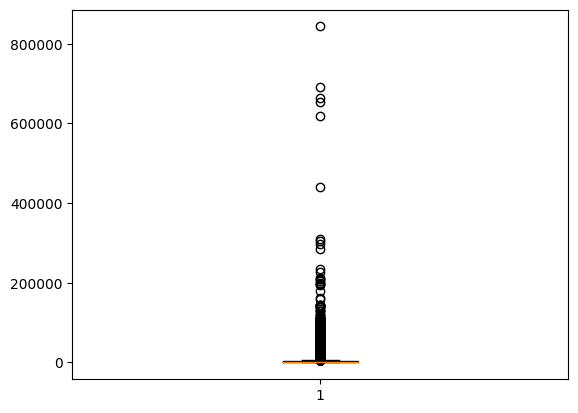

In [14]:
# Box plot for outlier detection
plt.boxplot(df[' shares'])
plt.show()

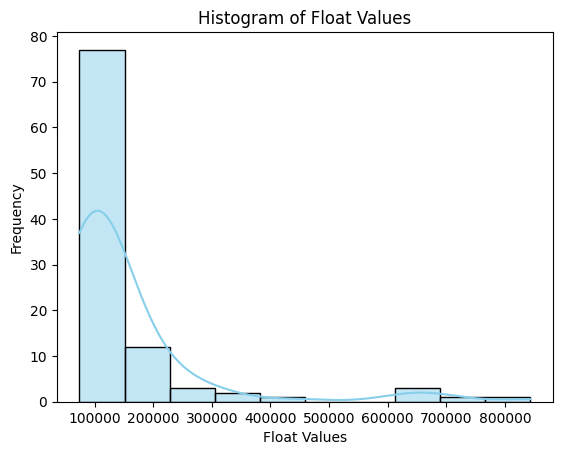

In [15]:
sns.histplot(df[' shares'].nlargest(100), bins=10, kde=True, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel('Float Values')
plt.ylabel('Frequency')
plt.title('Histogram of Float Values')
plt.show()

In [16]:
df[' shares'].nsmallest(10)

url
http://mashable.com/2013/12/09/wand-remote-control/                                 1
http://mashable.com/2013/04/01/troll-appreciation-day-tickets-2/                    4
http://mashable.com/2014/12/10/mad-max-trailer/                                     5
http://mashable.com/2013/07/11/nokia-lumia-1020/                                    8
http://mashable.com/2014/01/16/titanic-replica-theme-park/                         22
http://mashable.com/2014/10/09/lying-down-for-jobs-during-the-great-depression/    22
http://mashable.com/2013/07/10/tablets-education-competition/                      23
http://mashable.com/2014/10/10/battle-for-kobani/                                  28
http://mashable.com/2014/10/23/air-new-zealand-hobbit-video/                       28
http://mashable.com/2014/07/10/wireless-birth-control/                             35
Name:  shares, dtype: int64

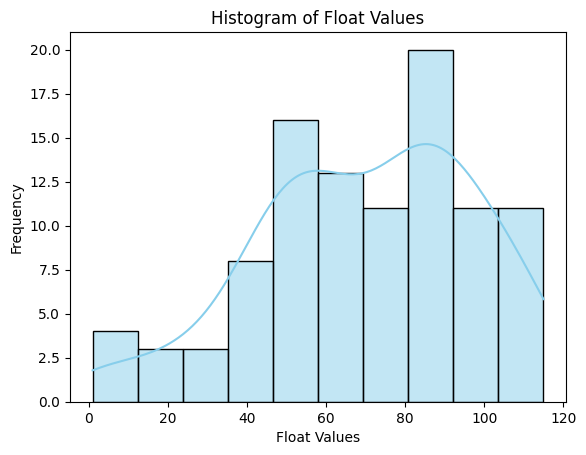

In [17]:
sns.histplot(df[' shares'].nsmallest(100), bins=10, kde=True, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel('Float Values')
plt.ylabel('Frequency')
plt.title('Histogram of Float Values')
plt.show()

                                 timedelta   n_tokens_title  \
 timedelta                        1.000000        -0.240320   
 n_tokens_title                  -0.240320         1.000000   
 n_tokens_content                -0.062867         0.018160   
 n_unique_tokens                  0.002866        -0.005318   
 n_non_stop_words                 0.000089        -0.004754   
 n_non_stop_unique_tokens         0.003805        -0.005420   
 num_hrefs                       -0.000832        -0.053496   
 num_self_hrefs                   0.064530        -0.014856   
 num_imgs                        -0.027636        -0.008858   
 num_videos                       0.000936         0.051460   
 average_token_length             0.130465        -0.071403   
 num_keywords                     0.046884        -0.006077   
 data_channel_is_lifestyle        0.054492        -0.070815   
 data_channel_is_entertainment   -0.049109         0.132791   
 data_channel_is_bus              0.055788        -0.02

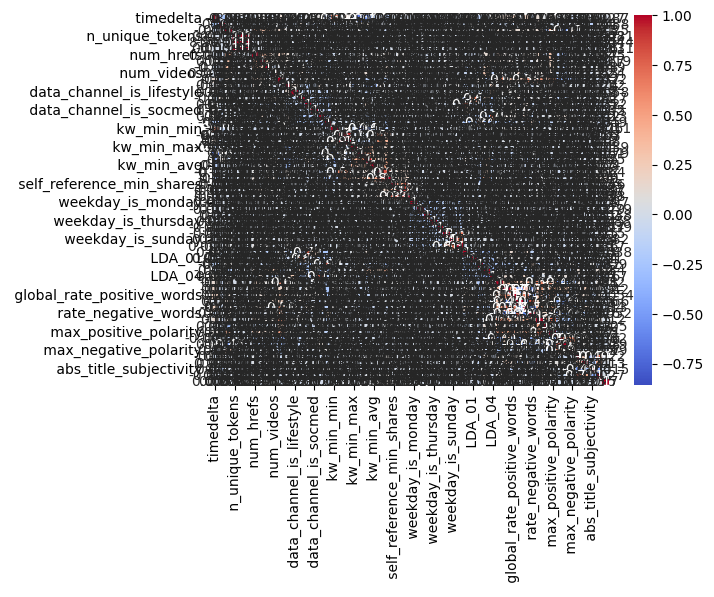

In [18]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
# Heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



In [19]:
df[df.columns[1:]].corr()[' shares'][:]


 n_tokens_title                   0.008783
 n_tokens_content                 0.002459
 n_unique_tokens                  0.000806
 n_non_stop_words                 0.000443
 n_non_stop_unique_tokens         0.000114
 num_hrefs                        0.045404
 num_self_hrefs                  -0.001900
 num_imgs                         0.039388
 num_videos                       0.023936
 average_token_length            -0.022007
 num_keywords                     0.021818
 data_channel_is_lifestyle        0.005831
 data_channel_is_entertainment   -0.017006
 data_channel_is_bus             -0.012376
 data_channel_is_socmed           0.005021
 data_channel_is_tech            -0.013253
 data_channel_is_world           -0.049497
 kw_min_min                      -0.001051
 kw_max_min                       0.030114
 kw_avg_min                       0.030406
 kw_min_max                       0.003901
 kw_max_max                       0.007863
 kw_avg_max                       0.044686
 kw_min_avg

* No signs of Strong Correlation to the target variable "shares'

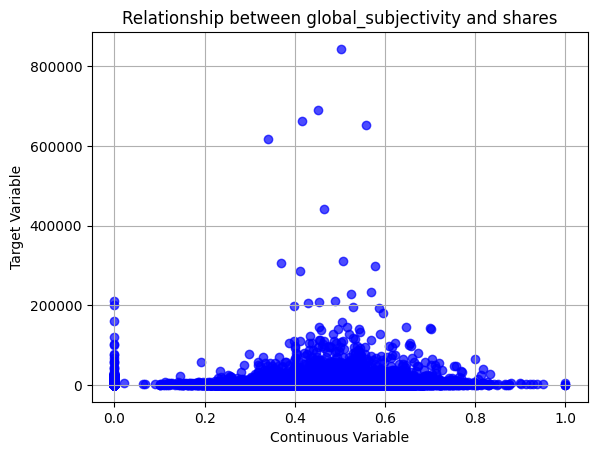

In [23]:
# Create a scatter plot

plt.scatter(df[' global_subjectivity'], df[' shares'], color='blue', alpha=0.7)
plt.xlabel('Continuous Variable')
plt.ylabel('Target Variable')
plt.title('Relationship between global_subjectivity and shares')
plt.grid(True)
plt.show()

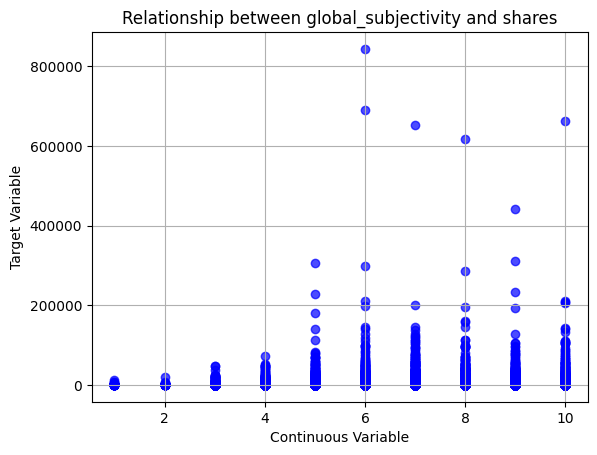

In [28]:
# Create a scatter plot

plt.scatter(df[' num_keywords'], df[' shares'], color='blue', alpha=0.7)
plt.xlabel('Continuous Variable')
plt.ylabel('Target Variable')
plt.title('Relationship between global_subjectivity and shares')
plt.grid(True)
plt.show()